In [1]:
import cv2
import dlib
import glob
import numpy as np
from matplotlib import pyplot as plt
import csv
from PIL import Image
import time
import math
import os

Face_cascad (video)

In [43]:
# Load the cascade
#face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier('haar-cascade-files//haarcascade_frontalface_alt.xml')



# To capture video from webcam. 
cap = cv2.VideoCapture(0)

# IP webcam
#cap = cv2.VideoCapture('http://192.168.1.101:8080/video')


while True:
    # Read the frame
    _, img = cap.read()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # save detect face in image size 350*350
        face = gray[y:y+h,x:x+w]
        out = cv2.resize(face,(350,350))
        cv2.imwrite('face.jpg',out)
        
    # Display
    cv2.imshow('img', img)


    # Stop if escape key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'): #Exit program when the user presses 'q'
        break
        
# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

In [44]:
print (len(faces))
faces

1


array([[247, 181, 184, 184]], dtype=int32)

face_cascad (image)

In [10]:
# Load the cascade
#face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier('haar-cascade-files//haarcascade_frontalface_alt.xml')


# Read the input image
img = cv2.imread('rama//5.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray,1.1, 4)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    # if there is face in image save it 
    if (len(faces)>0):
        face = gray[y:y+h,x:x+w]
        out = cv2.resize(face,(350,350))
        cv2.imwrite('face.jpg',out)

# Display the output
cv2.imshow('img', img)
cv2.waitKey()


-1

In [3]:
len(faces)

1

dlib (video)

In [37]:
#Set up some required objects
video_capture = cv2.VideoCapture(0) #Webcam object
detector = dlib.get_frontal_face_detector() #Face detector
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #Landmark identifier. Set the filename to whatever you named the downloaded file
while True:
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_image = clahe.apply(gray)

    detections = detector(clahe_image, 1) #Detect the faces in the image

    for k,d in enumerate(detections): #For each detected face
        shape = predictor(clahe_image, d) #Get coordinates
        for i in range(1,68): #There are 68 landmark points on each face
            cv2.circle(frame, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame

    cv2.imshow("image", frame) #Display the frame

    if cv2.waitKey(1) & 0xFF == ord('q'): #Exit program when the user presses 'q'
        break
video_capture.release()
cv2.destroyAllWindows()

dlib (image)
landmarks

[45, 169, 42, 199, 40, 230, 46, 262, 58, 289, 78, 309, 102, 323, 135, 332, 172, 337, 210, 335, 250, 331, 285, 315, 310, 291, 328, 258, 341, 224, 354, 188, 65, 109, 84, 95, 111, 93, 138, 100, 159, 110, 203, 109, 236, 102, 270, 105, 299, 121, 314, 146, 177, 136, 170, 150, 163, 165, 155, 179, 126, 204, 139, 210, 152, 215, 168, 217, 184, 219, 85, 130, 101, 122, 122, 125, 136, 139, 120, 138, 100, 137, 223, 155, 246, 145, 266, 150, 281, 165, 264, 166, 243, 162, 97, 252, 116, 245, 136, 242, 147, 249, 163, 249, 185, 263, 203, 281, 177, 287, 152, 286, 137, 282, 125, 278, 108, 267, 105, 253, 134, 254, 145, 258, 161, 261, 193, 278, 156, 271, 140, 268, 129, 263]


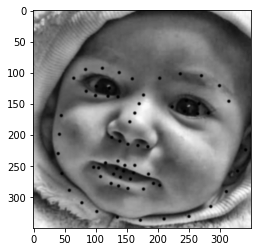

In [8]:
image  = cv2.imread('face.jpg')

detector = dlib.get_frontal_face_detector() #Face detector
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #Landmark identifier. Set the filename to whatever you named the downloaded file

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(gray)

detections = detector(clahe_image, 1) #Detect the faces in the image
landmarks = []

for k,d in enumerate(detections): #For each detected face
    shape = predictor(clahe_image, d) #Get coordinates
    xlist = []
    ylist = []
    
    for i in range(1,68): #There are 68 landmark points on each face
        xlist.append(float(shape.part(i).x))
        ylist.append(float(shape.part(i).y))
        
        #x1,y1,x2,y2,......
        landmarks.append(shape.part(i).x)
        landmarks.append(shape.part(i).y)
        
        #print ((shape.part(i).x),shape.part(i).y)
        
        cv2.circle(clahe_image, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame



#***************** 47 ****************** blue
#cv2.circle(image, (landmarks[90], landmarks[91]), 1, (0,0,255), thickness=2) 
#***************** 48 ****************** red
#cv2.circle(image, (landmarks[92], landmarks[93]), 1, (255,0,0), thickness=2) 
#*************** 62 ********************* blue
#cv2.circle(image, (landmarks[120], landmarks[121]), 1, (0,0,255), thickness=2)
#*************** 68 ********************* red
#cv2.circle(image, (landmarks[132], landmarks[133]), 1, (255,0,0), thickness=2)


#cv2.imshow("image",image) #Display the frame
plt.imshow(clahe_image, cmap = 'gray', interpolation = 'bicubic')

#plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
print(landmarks)
cv2.destroyAllWindows()

Distance betwen (38) and (42)

In [78]:
x_Right = landmarks[80] - landmarks[72]
y_Right = landmarks[81] - landmarks[73]
d_Right = math.sqrt(pow(x_Right,2) + pow(y_Right,2))
print(d_Right)

10.198039027185569


Distance betwen (44) and (48)

In [79]:
x_Lift = landmarks[92] - landmarks[84]
y_Lift = landmarks[93] - landmarks[85]
d_Lift = math.sqrt(pow(x_Lift,2) + pow(y_Lift,2))
print(d_Lift)

12.0


distans for eye points

In [80]:
distance = (d_Lift + d_Right)/2
print(distance)
if distance >= 12 :
    print('Baby wake up')
else:
    print('Baby sleep')


11.099019513592784
Baby sleep


Distance betwen (62) and (68)

In [81]:
x1_Right = landmarks[132] - landmarks[120]
y1_Right = landmarks[133] - landmarks[121]
d1_Right = math.sqrt(pow(x1_Right,2) + pow(y1_Right,2))
print(d1_Right)

28.0178514522438


Distance betwen (64) and (66)

In [82]:
x1_Lift = landmarks[128] - landmarks[124]
y1_Lift = landmarks[129] - landmarks[125]
d1_Lift = math.sqrt(pow(x1_Lift,2) + pow(y1_Lift,2))
print(d1_Lift)

28.0


In [83]:
distance1 = (d1_Right + d1_Lift)/2
print(distance1)

28.008925726121902


In [84]:
if ((distance >= 12) and (distance1 <21 )):
    print('Baby Wake up')
elif((distance < 12) and (distance1 <21 )):
    print('Baby sleep')
elif ((distance >=12) and (distance1 > 21 )):
    print('Baby Wake up and Smile')
elif((distance < 12) and (distance1 > 21 )):
    print('Baby Cry')


Baby Cry


------------------- TEST CODE'S ------------------

In [70]:
print(".... Najib Haj Bakri .....")
print("*** All The Best For You ****")

.... Najib Haj Bakri .....
*** All The Best For You ****


In [ ]:
import time
import cv2
from matplotlib import pyplot as plt
starttime=time.time()
while True:
    
    print('sedra')
    imag = cv2.imread('sleep.jpg')
    plt.imshow(imag, cmap = 'gray', interpolation = 'bicubic')
    print('Oook')
    a = 30.0 - ((time.time() - starttime) % 30.0)
    print (a)
    time.sleep(30.0 - ((time.time() - starttime) % 30.0))
    
   

sedra
Oook
29.95903205871582
sedra
Oook
29.990857362747192
sedra
Oook
29.990780353546143


In [10]:
# play video from IP webcam
cap = cv2.VideoCapture('http://192.168.1.101:8080/video')

KPS = 30 # Target Keyframes Per Second

try:
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error: Creating directory of data')

fps = round(cap.get(cv2.CAP_PROP_FPS))
hop = round(fps * KPS)

currentFrame = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break
    # Saves image of the current frame in jpg file
    if currentFrame % hop == 0:
        ## save in the same image 
        name = 'frame.jpg'
        print ('Creating...' + name)
        cv2.imwrite(name, frame)
        
#*********************************************************************   
        Haar_cascad_f()
#*********************************************************************
        d = dlib_f()
#*********************************************************************
        destance_f(d)
#*******************************************************************
    currentFrame += 1
    
# When everything done, release the captureq
cap.release()
cv2.destroyAllWindows()

Creating...frame.jpg
d_Right =  19.026297590440446
d_Lift =  19.026297590440446
1.0
0.0
Destance =  19.026297590440446
Baby wake up
Creating...frame.jpg
d_Right =  8.06225774829855
d_Lift =  8.0
1.0
2.0
Destance =  8.031128874149275
Baby sleep


Haar Cascad Function 

In [2]:
def Haar_cascad_f():
    face_cascade = cv2.CascadeClassifier('haar-cascade-files//haarcascade_frontalface_alt.xml')
    
    img = cv2.imread('frame.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.1, 4)
    
    for (x, y, w, h) in faces:
        #cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        if (len(faces)>0):
            face = gray[y:y+h,x:x+w]
            out = cv2.resize(face,(350,350))
            cv2.imwrite('face.jpg',out)
            
    #cv2.imshow('img', img)
    cv2.waitKey()
    
    return

In [27]:
Haar_cascad_f()

dlib function

In [3]:
def dlib_f():
    
    image  = cv2.imread('face.jpg')
    
    detector = dlib.get_frontal_face_detector() #Face detector
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #Landmark identifier. Set the filename to whatever you named the downloaded file
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_image = clahe.apply(gray)
    
    detections = detector(clahe_image, 1) #Detect the faces in the image
    landmarks = []
    
    for k,d in enumerate(detections): #For each detected face
        shape = predictor(clahe_image, d) #Get coordinates
        xlist = []
        ylist = []
        
        for i in range(1,68): #There are 68 landmark points on each face
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
            
            #x1,y1,x2,y2,......
            landmarks.append(shape.part(i).x)
            landmarks.append(shape.part(i).y)
            
            #print ((shape.part(i).x),shape.part(i).y)
            
            #cv2.circle(clahe_image, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=2) #For each point, draw a red circle with thickness2 on the original frame
        
    #print(landmarks)
    #a = landmarks
    #print(a)
    
    #plt.imshow(clahe_image, cmap = 'gray', interpolation = 'bicubic')
    cv2.destroyAllWindows()
    
    return landmarks

In [9]:
def distance_f(landmarks):
    # Right eye
    # between (38,42)
    x_Right = landmarks[80] - landmarks[72]
    y_Right = landmarks[81] - landmarks[73]
    d_Right = math.sqrt(pow(x_Right,2) + pow(y_Right,2))
    print('d_Right = ',d_Right)
    
    #left eye
    # between (44,48)
    x_Lift = landmarks[92] - landmarks[84]
    y_Lift = landmarks[93] - landmarks[85]
    d_Lift = math.sqrt(pow(x_Lift,2) + pow(y_Lift,2))
    print('d_Lift = ',d_Lift)
    
    # right mouth
    #between (62,68)
    x1_Right = landmarks[132] - landmarks[120]
    y1_Right = landmarks[133] - landmarks[121]
    d1_Right = math.sqrt(pow(x1_Right,2) + pow(y1_Right,2))
    print('d1_Right = ',d1_Right)
    
    #left mouth
    # between (64,66)
    x1_Lift = landmarks[128] - landmarks[124]
    y1_Lift = landmarks[129] - landmarks[125]
    d1_Lift = math.sqrt(pow(x1_Lift,2) + pow(y1_Lift,2))
    print('d1_Lift = ',d1_Lift)
    
    distance_eye = (d_Lift + d_Right)/2
    distance_mouth = (d1_Right + d1_Lift)/2
    
    print('Distance_eye = ',distance_eye)
    print('Distance_mouth = ',distance_mouth)
    
    
    
    if ((distance_eye >= 12) and (distance_mouth < 21)) :
        state_2 = 'wake up'
        #print('Baby wake up')
        if (state_1 != state_2):
            state_1 = state_2
            state_2 = ''
            print('Baby',state_1)
        else :
            print ('OOk')
    
    #elif((distance_eye < 12) and (distance_mouth < 21)):
     #   state_2 = 'sleep'
        #print('Baby sleep')
      #  if(state_1 != state_2):
       #     state_1 = state_2
        #    state_2 = ''
         #   print('Baby',state_1)
        #else : 
         #   print ('OOk')
  
    #elif((distance_eye >= 12) and (distance_mouth > 21)):
     #   print('Baby smile')
    
   # elif((distance_eye < 12) and (distance_mouth >= 21)):
    #    print('Baby cry')
        
    return

In [20]:
destance_f([25, 198, 32, 228, 38, 259, 50, 288, 71, 311, 102, 327, 132, 340, 166, 348, 201, 348, 235, 341, 274, 330, 305, 310, 324, 279, 335, 245, 345, 210, 352, 172, 47, 121, 67, 99, 97, 88, 131, 84, 162, 92, 198, 96, 231, 88, 266, 92, 299, 105, 322, 126, 180, 133, 180, 146, 180, 160, 180, 175, 151, 208, 165, 209, 178, 211, 192, 210, 207, 209, 83, 148, 101, 135, 123, 134, 141, 150, 122, 156, 99, 156, 222, 152, 241, 137, 264, 138, 282, 152, 264, 160, 241, 159, 120, 257, 143, 243, 164, 233, 177, 236, 188, 234, 208, 245, 228, 262, 206, 274, 186, 278, 174, 277, 160, 276, 140, 271, 130, 255, 163, 245, 176, 246, 187, 246, 220, 260, 187, 266, 175, 267, 162, 265])

d_Right =  21.095023109728988
d_Lift =  22.0
d1_Right =  20.024984394500787
d1_Lift =  20.0
Distance_eye =  21.547511554864492
Distance_mouth =  20.012492197250396
Baby wake up


In [23]:
destance_f([-26, 176, -21, 225, -10, 265, 15, 299, 52, 322, 90, 338, 127, 348, 158, 348, 180, 336, 192, 311, 208, 289, 227, 267, 244, 241, 255, 213, 260, 182, 261, 151, 32, 108, 62, 91, 97, 85, 130, 92, 161, 103, 212, 103, 230, 96, 246, 89, 261, 89, 270, 99, 187, 135, 192, 158, 198, 180, 203, 203, 156, 227, 173, 227, 189, 228, 202, 226, 213, 221, 70, 138, 92, 129, 114, 129, 133, 142, 114, 146, 91, 147, 201, 139, 216, 127, 232, 126, 243, 133, 234, 143, 217, 143, 116, 277, 146, 263, 174, 253, 185, 256, 195, 252, 202, 259, 204, 268, 197, 281, 188, 293, 177, 296, 166, 296, 142, 291, 127, 275, 172, 269, 183, 269, 193, 267, 198, 268, 190, 268, 180, 272, 169, 273])

d_Right =  18.027756377319946
d_Lift =  16.0312195418814
d1_Right =  5.0
d1_Lift =  3.1622776601683795
Distance_eye =  17.029487959600672
Distance_mouth =  4.08113883008419
Baby wake up


In [26]:
destance_f([53, 193, 64, 224, 79, 252, 103, 273, 132, 288, 166, 296, 196, 300, 222, 297, 248, 287, 272, 269, 298, 250, 318, 225, 327, 193, 329, 157, 330, 120, 328, 81, 52, 133, 59, 109, 79, 93, 106, 86, 132, 86, 173, 75, 198, 64, 225, 58, 254, 62, 280, 75, 162, 116, 165, 134, 167, 151, 169, 168, 154, 190, 167, 190, 179, 189, 191, 184, 203, 179, 85, 150, 99, 140, 116, 133, 134, 135, 120, 145, 103, 149, 202, 118, 216, 108, 234, 105, 255, 106, 238, 115, 220, 118, 145, 236, 158, 221, 171, 210, 182, 209, 191, 204, 212, 207, 237, 214, 220, 232, 205, 242, 194, 246, 183, 248, 167, 248, 154, 233, 175, 221, 185, 218, 196, 216, 228, 215, 198, 226, 188, 230, 177, 232])

d_Right =  9.848857801796104
d_Lift =  10.770329614269007
d1_Right =  11.180339887498949
d1_Lift =  10.198039027185569
Distance_eye =  10.309593708032555
Distance_mouth =  10.689189457342259
Baby sleep


In [29]:
destance_f([36, 163, 37, 197, 41, 231, 54, 262, 76, 285, 102, 300, 128, 309, 157, 315, 187, 315, 217, 307, 250, 295, 277, 276, 297, 250, 310, 217, 319, 184, 327, 149, 60, 97, 78, 82, 105, 79, 131, 86, 155, 96, 199, 98, 223, 91, 250, 91, 273, 99, 290, 116, 173, 128, 171, 146, 169, 162, 167, 180, 142, 203, 155, 205, 167, 207, 181, 206, 195, 205, 84, 137, 103, 136, 120, 136, 136, 141, 118, 144, 101, 142, 210, 146, 229, 144, 245, 149, 261, 151, 244, 155, 226, 153, 120, 245, 139, 233, 155, 226, 167, 230, 179, 228, 196, 238, 215, 254, 193, 255, 177, 254, 164, 254, 151, 253, 137, 252, 128, 244, 154, 239, 166, 241, 178, 241, 208, 251, 177, 241, 165, 241, 153, 240])

d_Right =  6.324555320336759
d_Lift =  9.486832980505138
d1_Right =  1.4142135623730951
d1_Lift =  1.0
Distance_eye =  7.905694150420949
Distance_mouth =  1.2071067811865475
Baby sleep


In [32]:
destance_f([-6, 212, -2, 251, 5, 289, 24, 321, 53, 343, 92, 352, 133, 354, 175, 353, 212, 352, 239, 346, 263, 331, 282, 307, 296, 279, 304, 249, 303, 217, 297, 186, 44, 104, 65, 86, 94, 79, 123, 84, 150, 97, 208, 103, 231, 97, 254, 96, 275, 103, 287, 121, 186, 128, 191, 145, 196, 160, 201, 176, 159, 207, 175, 209, 193, 212, 208, 211, 221, 209, 78, 134, 98, 127, 118, 126, 137, 137, 117, 137, 97, 136, 219, 146, 237, 140, 254, 144, 268, 154, 253, 153, 235, 150, 116, 270, 145, 251, 175, 241, 193, 246, 209, 242, 229, 255, 240, 276, 224, 291, 205, 296, 187, 295, 167, 292, 142, 284, 125, 269, 173, 257, 192, 259, 208, 259, 232, 274, 205, 278, 189, 278, 170, 276])

d_Right =  9.055385138137417
d_Lift =  10.198039027185569
d1_Right =  19.235384061671343
d1_Lift =  19.235384061671343
Distance_eye =  9.626712082661493
Distance_mouth =  19.235384061671343
Baby sleep


In [35]:
destance_f([27, 232, 26, 262, 31, 291, 45, 315, 67, 331, 96, 344, 130, 348, 166, 351, 203, 352, 236, 350, 266, 343, 287, 327, 304, 304, 314, 275, 322, 245, 329, 214, 48, 127, 64, 102, 90, 86, 121, 86, 146, 99, 197, 101, 225, 95, 253, 101, 277, 119, 291, 142, 173, 128, 172, 142, 169, 155, 168, 169, 137, 202, 151, 203, 164, 206, 178, 207, 191, 209, 75, 146, 94, 137, 113, 137, 128, 145, 113, 146, 94, 146, 207, 151, 226, 144, 245, 149, 262, 159, 244, 157, 226, 156, 109, 269, 121, 239, 145, 229, 160, 233, 179, 232, 206, 249, 221, 278, 203, 294, 177, 296, 157, 296, 140, 294, 120, 287, 119, 267, 145, 245, 159, 246, 178, 247, 211, 275, 177, 278, 158, 278, 143, 276])

d_Right =  9.0
d_Lift =  12.0
d1_Right =  31.064449134018133
d1_Lift =  31.016124838541646
Distance_eye =  10.5
Distance_mouth =  31.040286986279888
Baby cry


In [39]:
destance_f([29, 237, 36, 270, 45, 304, 60, 333, 89, 354, 124, 367, 166, 374, 209, 373, 253, 364, 293, 354, 328, 339, 351, 313, 356, 275, 358, 238, 361, 196, 363, 156, 30, 157, 42, 127, 70, 106, 105, 96, 141, 100, 188, 90, 225, 77, 265, 78, 302, 90, 328, 116, 166, 137, 166, 156, 165, 174, 164, 193, 143, 231, 158, 231, 175, 231, 192, 226, 209, 223, 67, 172, 82, 152, 105, 148, 128, 164, 106, 171, 84, 174, 221, 151, 240, 128, 265, 125, 289, 138, 269, 146, 244, 150, 120, 305, 137, 277, 161, 260, 179, 261, 195, 255, 230, 264, 262, 288, 239, 309, 210, 319, 192, 322, 173, 323, 146, 320, 132, 302, 165, 280, 182, 277, 199, 275, 249, 288, 205, 301, 187, 303, 169, 305]
)

d_Right =  22.090722034374522
d_Lift =  22.360679774997898
d1_Right =  25.317977802344327
d1_Lift =  26.68332812825267
Distance_eye =  22.22570090468621
Distance_mouth =  26.0006529652985
Baby smile


In [42]:
destance_f([42, 171, 47, 205, 55, 239, 69, 271, 90, 297, 117, 319, 145, 336, 174, 345, 207, 344, 241, 330, 274, 310, 302, 283, 319, 250, 330, 215, 338, 177, 342, 139, 60, 114, 76, 100, 99, 96, 123, 99, 145, 108, 204, 109, 229, 100, 257, 99, 284, 105, 304, 122, 173, 135, 172, 155, 171, 174, 169, 195, 149, 214, 160, 217, 172, 220, 186, 218, 199, 216, 88, 138, 104, 131, 121, 131, 137, 141, 119, 142, 102, 141, 219, 144, 236, 133, 254, 134, 271, 143, 254, 146, 236, 145, 128, 267, 143, 255, 160, 250, 174, 253, 187, 250, 207, 256, 224, 272, 206, 291, 187, 299, 173, 299, 158, 296, 142, 286, 135, 267, 160, 257, 174, 259, 187, 258, 217, 271, 187, 286, 173, 288, 159, 285])

d_Right =  10.198039027185569
d_Lift =  12.0
d1_Right =  28.0178514522438
d1_Lift =  28.0
Distance_eye =  11.099019513592784
Distance_mouth =  28.008925726121902
Baby cry


In [45]:
destance_f([7, 221, 18, 257, 32, 288, 50, 314, 77, 335, 111, 348, 148, 353, 184, 355, 219, 353, 248, 344, 267, 323, 279, 295, 285, 264, 288, 234, 290, 202, 289, 171, 47, 128, 65, 102, 93, 86, 125, 77, 156, 82, 190, 82, 216, 76, 244, 82, 267, 98, 277, 126, 175, 127, 179, 141, 182, 154, 186, 167, 156, 207, 170, 207, 184, 207, 195, 207, 205, 206, 81, 150, 96, 134, 116, 133, 135, 148, 116, 153, 97, 154, 204, 148, 220, 132, 240, 132, 254, 148, 240, 153, 221, 152, 136, 279, 151, 250, 173, 236, 187, 239, 200, 235, 219, 249, 227, 279, 221, 304, 204, 315, 190, 316, 174, 314, 153, 302, 146, 277, 173, 252, 187, 253, 199, 253, 219, 276, 202, 293, 189, 294, 174, 291])

d_Right =  20.024984394500787
d_Lift =  20.024984394500787
d1_Right =  39.01281840626232
d1_Lift =  40.11234224026316
Distance_eye =  20.024984394500787
Distance_mouth =  39.562580323262736
Baby smile


In [49]:
destance_f([39, 177, 46, 214, 53, 249, 67, 278, 88, 303, 113, 321, 141, 334, 170, 339, 198, 338, 227, 327, 257, 310, 284, 289, 301, 257, 309, 222, 314, 185, 319, 145, 61, 125, 79, 109, 104, 101, 131, 99, 157, 107, 202, 111, 227, 101, 254, 96, 283, 101, 302, 120, 178, 137, 179, 155, 181, 174, 182, 194, 154, 215, 168, 216, 181, 217, 195, 215, 209, 213, 90, 143, 108, 130, 127, 129, 144, 146, 126, 149, 106, 148, 216, 143, 231, 126, 251, 124, 268, 135, 253, 142, 233, 144, 115, 252, 138, 244, 164, 237, 181, 240, 196, 236, 219, 241, 239, 250, 219, 283, 196, 297, 180, 299, 162, 298, 135, 285, 123, 254, 164, 244, 181, 246, 195, 244, 232, 252, 195, 284, 180, 287, 162, 286])

d_Right =  18.110770276274835
d_Lift =  18.110770276274835
d1_Right =  42.04759208325728
d1_Lift =  40.0
Distance_eye =  18.110770276274835
Distance_mouth =  41.02379604162864
Baby smile


In [52]:
destance_f([8, 200, 15, 235, 25, 270, 43, 300, 74, 322, 113, 335, 150, 345, 186, 346, 218, 337, 245, 319, 275, 301, 299, 278, 312, 246, 316, 212, 316, 176, 318, 139, 37, 140, 58, 123, 87, 117, 117, 117, 147, 122, 191, 114, 214, 100, 242, 93, 269, 94, 290, 109, 170, 141, 172, 157, 174, 173, 175, 190, 149, 215, 163, 216, 176, 217, 189, 212, 200, 208, 75, 156, 92, 145, 112, 143, 130, 155, 112, 159, 92, 161, 205, 145, 220, 128, 239, 125, 256, 133, 243, 142, 224, 146, 113, 262, 137, 251, 162, 243, 177, 243, 189, 239, 213, 241, 234, 246, 216, 276, 195, 289, 181, 292, 165, 293, 140, 285, 121, 262, 163, 249, 177, 248, 190, 245, 226, 249, 193, 278, 179, 281, 165, 282])

d_Right =  16.0
d_Lift =  18.439088914585774
d1_Right =  33.06055050963308
d1_Lift =  33.13608305156178
Distance_eye =  17.219544457292887
Distance_mouth =  33.09831678059743
Baby smile


In [55]:
destance_f([32, 181, 37, 217, 45, 254, 61, 285, 86, 312, 114, 332, 142, 348, 172, 354, 204, 351, 231, 337, 261, 316, 286, 288, 302, 254, 311, 219, 316, 182, 321, 145, 62, 119, 81, 104, 105, 98, 131, 99, 155, 108, 196, 113, 221, 105, 249, 102, 275, 109, 293, 127, 174, 139, 175, 155, 176, 171, 176, 187, 152, 209, 163, 212, 176, 216, 190, 213, 203, 210, 91, 142, 107, 134, 124, 134, 139, 147, 122, 148, 105, 147, 213, 150, 228, 138, 245, 138, 261, 146, 246, 150, 228, 151, 125, 262, 141, 246, 163, 240, 177, 243, 190, 240, 211, 247, 225, 265, 210, 300, 189, 317, 175, 319, 159, 316, 139, 299, 130, 263, 163, 246, 177, 248, 190, 247, 220, 266, 189, 303, 176, 306, 161, 303])

d_Right =  13.152946437965905
d_Lift =  13.0
d1_Right =  57.0350769263968
d1_Lift =  56.00892785976178
Distance_eye =  13.076473218982953
Distance_mouth =  56.52200239307929
Baby smile


In [58]:
destance_f([33, 176, 41, 214, 52, 248, 73, 276, 104, 296, 136, 312, 165, 327, 194, 329, 221, 318, 247, 296, 275, 275, 299, 252, 313, 221, 319, 187, 323, 150, 324, 112, 43, 126, 60, 106, 87, 96, 116, 97, 144, 104, 195, 100, 222, 90, 250, 85, 278, 89, 298, 107, 173, 138, 175, 157, 177, 176, 178, 195, 150, 212, 164, 214, 180, 216, 194, 211, 208, 206, 80, 144, 97, 134, 116, 133, 135, 146, 117, 149, 96, 149, 211, 140, 226, 124, 245, 123, 264, 130, 249, 138, 229, 141, 121, 251, 144, 245, 168, 239, 181, 241, 193, 236, 216, 238, 238, 240, 220, 274, 200, 292, 186, 296, 171, 296, 146, 284, 128, 252, 169, 248, 182, 248, 194, 245, 230, 242, 197, 275, 184, 279, 170, 279])

d_Right =  15.033296378372908
d_Lift =  17.26267650163207
d1_Right =  31.016124838541646
d1_Lift =  30.14962686336267
Distance_eye =  16.147986440002487
Distance_mouth =  30.582875850952156
Baby smile


In [2]:
state_1 = 'sleep'
state_2 = str()
if (5 > 2):
    state_2 = 'cry'
    if (state_1 != state_2):
        state_1 = state_2
        state_2 = ''
        print('baby',state_1)
        #print(state_2)

baby cry


In [10]:
x = 0
s1 ='sedra'
s2 = str()
while x < 10:    
    if (x > 7):
        s2 = 'omari'
        if (s1 != s2):
            s1 = s2
            print(s1)
            s2 = ''
        else :
            print('ook')
    else :
        print('')
    x+=1

soory
soory
soory
soory
soory
soory
soory
soory
omari
ook


In [7]:
    state_1 = 'sedra'
    state_2 = str()
    
    if ((distance_eye >= 12) and (distance_mouth < 21)) :
        state_2 = 'wake up'
        #print('Baby wake up')
        if (state_1 != state_2):
            state_1 = state_2
            state_2 = ''
            print('Baby',state_1)
        else :
            print ('OOk')

NameError: name 'distance_eye' is not defined